# PROJECT TITLE : STUDENT DATABASE MANAGEMENT

# PURPOSE :
A Student Database Management System (SDMS) is designed to efficiently handle and manage student-related data within educational institutions. All student information, including personal details, academic records, attendance, and grades, is stored in a single, centralized database, making it easy to access and manage.The system can facilitate communication between students, faculty, and administration by providing platforms for notifications, announcements, and feedback.

####   Importing required libraries

In [2]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

#### Connecting to MySQL database

In [3]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='Kusuma@123',
host='localhost',
database='studentdatabasemanagement'
)

#### Importing tables from database

#### STUDENTS TABLE

In [4]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'students' table
cursor.execute('SELECT * FROM students')
#After fetching data from the database we are storing it into Pandas DataFrame
students_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(students_data.head())

   student_id first_name last_name date_of_birth  gender  \
0           1     Ananya   Agarwal    2000-05-15  Female   
1           2      Aarav      Bhat    2001-08-20    Male   
2           3      Aditi    Chopra    1999-03-10  Female   
3           4       Amit  Deshmukh    2000-07-25    Male   
4           5  Aishwarya     Gupta    2002-01-05  Female   

                   address   phone_number                        email  \
0   123 Main St, Cityville  +919876543210   ananya.agarwal@example.com   
1   456 Elm St, Townsville  +919012345678       aarav.bhat@example.com   
2   789 Oak St, Villageton  +919876543210     aditi.chopra@example.com   
3      321 Pine St, Hamlet  +918765432109    amit.deshmukh@example.com   
4  654 Cedar St, Riverside  +919012345678  aishwarya.gupta@example.com   

  enrollment_date  department_id  attendance_percent  grade_percent  
0      2022-09-01              1                89.5           75.0  
1      2022-09-01              2                92.0  

#### DEPARTMENTS TABLE

In [5]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'departments' table
cursor.execute('SELECT * FROM departments')
#After fetching data from the database we are storing it into Pandas DataFrame
departments_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(departments_data.head())

   department_id          department_name head_of_department
0              1         Computer Science      Alice Johnson
1              2  Electronics Engineering         Jack Clark
2              3   Electrical Engineering          Bob Smith
3              4   Mechanical Engineering      Charlie Brown
4              5        Civil Engineering       David Wilson


#### COURSES TABLE

In [6]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'restaurant' table
cursor.execute('SELECT * FROM courses')
#After fetching data from the database we are storing it into Pandas DataFrame
courses_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(courses_data.head())

   course_id                       course_name  department_id  credits
0          1  Introduction to Computer Science              1        4
1          2    Data Structures and Algorithms              1        5
2          3       Database Management Systems              1        4
3          4                 Computer Networks              1        4
4          5           Artificial Intelligence              1        5


#### INSTRUCTORS TABLE

In [7]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'instructors' table
cursor.execute('SELECT * FROM instructors')
#After fetching data from the database we are storing it into Pandas DataFrame
instructors_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(instructors_data.head())

   instructor_id first_name last_name                     email  phone_number  \
0              1      Rahul    Sharma  rahul.sharma@example.com  123-456-7890   
1              2      Priya     Patel   priya.patel@example.com  987-654-3210   
2              3       Amit     Verma    amit.verma@example.com  456-789-0123   
3              4       Neha     Singh    neha.singh@example.com  111-222-3333   
4              5     Rajesh     Yadav  rajesh.yadav@example.com  444-555-6666   

   department_id  
0              1  
1              1  
2              1  
3              2  
4              2  


#### ENROLLMENTS TABLE

In [8]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'instructors' table
cursor.execute('SELECT * FROM enrollments')
#After fetching data from the database we are storing it into Pandas DataFrame
enrollments_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(enrollments_data.head())

   enrollment_id  student_id  course_id enrollment_date
0              1           1          1      2023-01-01
1              2           2          2      2023-01-02
2              3           3          3      2023-01-03
3              4           4          4      2023-01-04
4              5           5          5      2023-01-05


### CLEANING OR PROCESSING DATA

#### CHECKING FOR NULL VALUES

In [9]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("students\n----------")
print(students_data.isnull().sum())
print("\ndepartments\n----------")
print(departments_data.isnull().sum())
print("\ncourses\n----------")
print(courses_data.isnull().sum())
print("\ninstructorss\n----------")
print(instructors_data.isnull().sum())
print("\nenrollments\n----------")
print(enrollments_data.isnull().sum())

students
----------
student_id            0
first_name            0
last_name             0
date_of_birth         0
gender                0
address               0
phone_number          0
email                 0
enrollment_date       0
department_id         0
attendance_percent    0
grade_percent         0
dtype: int64

departments
----------
department_id         0
department_name       0
head_of_department    0
dtype: int64

courses
----------
course_id        0
course_name      0
department_id    0
credits          0
dtype: int64

instructorss
----------
instructor_id    0
first_name       0
last_name        0
email            0
phone_number     0
department_id    0
dtype: int64

enrollments
----------
enrollment_id      0
student_id         0
course_id          0
enrollment_date    0
dtype: int64


Indicating there are no null values.

#### CHECKING FOR DUPLICATE VALUES

In [10]:
# Print the number of duplicate rows in the DataFrame
print("students\n----------")
print(students_data.duplicated().sum())
print("\ndepartments\n----------")
print(departments_data.duplicated().sum())
print("\ncourses\n----------")
print(courses_data.duplicated().sum())
print("\ninstructors\n----------")
print(instructors_data.duplicated().sum())
print("\nenrollments\n----------")
print(enrollments_data.duplicated().sum())

students
----------
0

departments
----------
0

courses
----------
0

instructors
----------
0

enrollments
----------
0


Indicating there are no any duplicate values.

### Visualizing the data

##### sorting based on first name of students

In [36]:
students_data.sort_values(by='first_name', ascending=True).head()

,student_id,first_name,last_name,date_of_birth,gender,address,phone_number,email,enrollment_date,department_id,attendance_percent,grade_percent
43,44,Aadhya,Kapoor,2001-11-15,Female,"987 Birch St, Lakeside",+918765432109,aadhya.kapoor@example.com,2022-09-01,5,93.0,86.0
27,28,Aadi,Sharma,2002-06-20,Male,"654 Elm St, Riverside",+918765432109,aadi.sharma@example.com,2022-09-01,4,99.0,91.0
24,25,Aanya,Joshi,2001-07-08,Female,"321 Oak St, Townsville",+918765432109,aanya.joshi@example.com,2022-09-01,1,96.0,88.0
39,40,Aanya,Das,2001-08-15,Female,"456 Elm St, Townsville",+919012345678,aanya.das@example.com,2022-09-01,1,89.0,82.0
22,23,Aaradhya,Shah,2000-10-18,Female,"234 Elm St, Sunset",+919012345678,aaradhya.shah@example.com,2022-09-01,4,94.0,86.0


####  Using group by for getting department wise student count 

   department_id  student_count
0              1             22
1              2             22
2              3             21
3              4             23
4              5             18


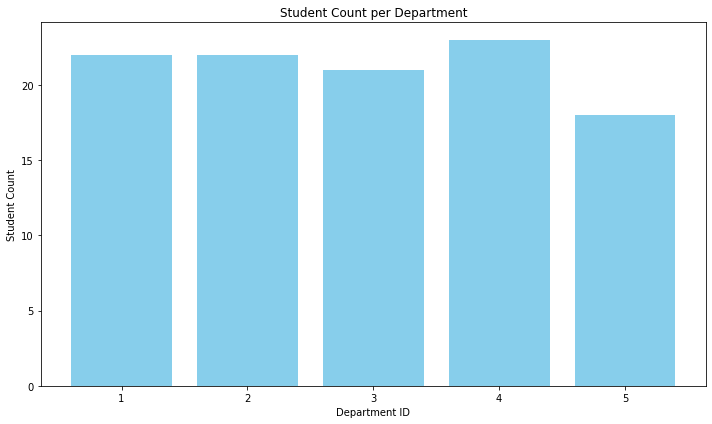

In [22]:
cursor.execute('SELECT department_id, COUNT(*) AS student_count FROM students GROUP BY department_id;')
# Fetch the data and store it into a Pandas DataFrame
studentCount_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
studentCount_data = pd.DataFrame(studentCount_data)
print(studentCount_data)
plt.figure(figsize=(10, 6))
plt.bar(studentCount_data['department_id'], studentCount_data['student_count'], color='skyblue')
plt.xlabel('Department ID')
plt.ylabel('Student Count')
plt.title('Student Count per Department')
plt.xticks(studentCount_data['department_id'], rotation=0)
plt.tight_layout()
plt.show()

From above graph we can say that department 4 i.e., Mechanical engineering is having more number of students.

#### Count of number of students in each course

    course_id  num_students
0           1             5
1           2             5
2           3             5
3           4             5
4           5             5
5           6             5
6           7             4
7           8             4
8           9             4
9          10             4
10         11             4
11         12             4
12         13             4
13         14             4
14         15             4
15         16             4
16         17             4
17         18             4
18         19             4
19         20             4
20         21             4
21         22             4
22         23             4
23         24             4
24         25             4


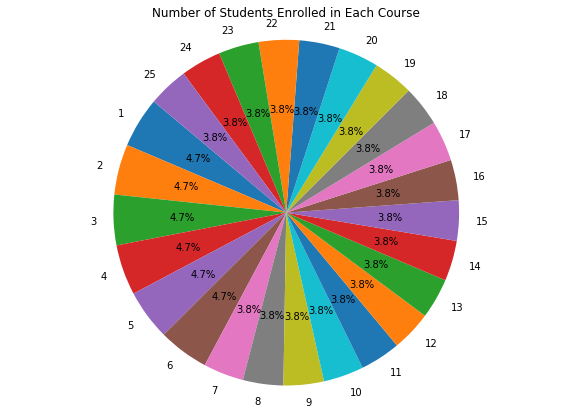

In [21]:
cursor.execute('SELECT course_id, COUNT(student_id) AS num_students FROM Enrollments GROUP BY course_id;')
# Fetch the data and store it into a Pandas DataFrame
enrollCount_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
enrollCount_data = pd.DataFrame(enrollCount_data)
print(enrollCount_data)
plt.figure(figsize=(10, 7))
plt.pie(enrollCount_data['num_students'], labels=enrollCount_data['course_id'], autopct='%1.1f%%', startangle=140)
plt.title('Number of Students Enrolled in Each Course')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

It is clear that the courses 1,2,3,4,5,6 are having more number of students.

#### Getting count of female and male students

   gender  num_students
0  Female            51
1    Male            55


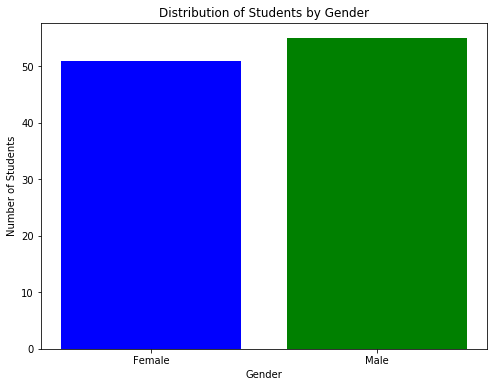

In [19]:
cursor.execute('SELECT gender, COUNT(*) AS num_students FROM Students GROUP BY gender;')
# Fetch the data and store it into a Pandas DataFrame
genderCount = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
genderCount = pd.DataFrame(genderCount)

print(genderCount)
plt.figure(figsize=(8, 6))
plt.bar(genderCount['gender'], genderCount['num_students'], color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Distribution of Students by Gender')
plt.show()



We are having more number of male students.

#### Department wise courses count

In [11]:
cursor.execute('SELECT department_id, COUNT(*) AS course_count FROM courses GROUP BY department_id;')
# Fetch the data and store it into a Pandas DataFrame
courseCount_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
courseCount_data = pd.DataFrame(courseCount_data)
print(courseCount_data)

   department_id  course_count
0              1             5
1              2             5
2              3             5
3              4             5
4              5             5


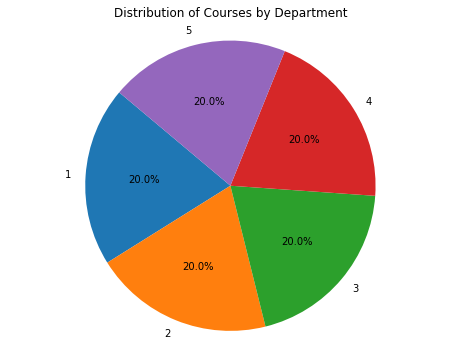

In [12]:
# Assuming courseCount_data is already fetched and stored in DataFrame
labels = courseCount_data['department_id']
sizes = courseCount_data['course_count']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Courses by Department')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

Each department is having equal number of courses.

#### Average credits for each course

In [13]:
cursor.execute('select course_id,course_name,avg(credits) from courses group by course_id; ')
# Fetch the data and store it into a Pandas DataFrame
avgCredits_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
avgCredits_data = pd.DataFrame(avgCredits_data)
print(avgCredits_data)

    course_id                       course_name avg(credits)
0           1  Introduction to Computer Science       4.0000
1           2    Data Structures and Algorithms       5.0000
2           3       Database Management Systems       4.0000
3           4                 Computer Networks       4.0000
4           5           Artificial Intelligence       5.0000
5           6                  Circuit Analysis       4.0000
6           7            Electromagnetic Fields       5.0000
7           8               Digital Electronics       4.0000
8           9                     Power Systems       5.0000
9          10                   Control Systems       4.0000
10         11                Analog Electronics       4.0000
11         12         Digital Signal Processing       5.0000
12         13                  Embedded Systems       4.0000
13         14                       VLSI Design       5.0000
14         15             Communication Systems       4.0000
15         16           

#### Number of instructors from each department.

In [15]:
cursor.execute('SELECT department_id, COUNT(*) AS instructor_count FROM instructors GROUP BY department_id;')
# Fetch the data and store it into a Pandas DataFrame
instPerDept_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
instPerDept_data = pd.DataFrame(instPerDept_data)
print(instPerDept_data)

   department_id  instructor_count
0              1                 3
1              2                 3
2              3                 3
3              4                 3
4              5                 3


#### Department wise average credits

In [16]:
cursor.execute('SELECT d.department_name, AVG(c.credits) AS average_credits FROM courses c JOIN departments d ON c.department_id = d.department_id GROUP BY d.department_name ORDER BY d.department_name; ')
# Fetch the data and store it into a Pandas DataFrame
avgCreditsDept_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
avgCreditsDept_data = pd.DataFrame(avgCreditsDept_data)
print(avgCreditsDept_data)

           department_name average_credits
0        Civil Engineering          4.4000
1         Computer Science          4.4000
2   Electrical Engineering          4.4000
3  Electronics Engineering          4.4000
4   Mechanical Engineering          4.4000


#### Count of students scoring 90 or greater than 90 grade percent.

Number of students scoring >= 90 grade percent: 10


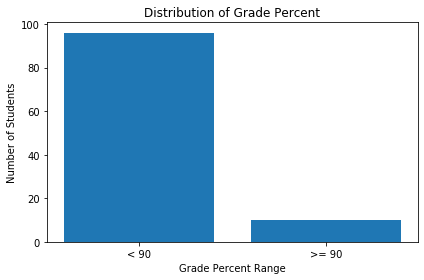

In [26]:
students_above_90 = students_data[students_data['grade_percent'] >= 90]

# Count the number of students
num_students_above_90 = students_above_90.shape[0]

# Display the count
print(f"Number of students scoring >= 90 grade percent: {num_students_above_90}")
grade_counts = students_data['grade_percent'].apply(lambda x: '>= 90' if x >= 90 else '< 90').value_counts()

plt.bar(grade_counts.index, grade_counts.values)
plt.xlabel('Grade Percent Range')
plt.ylabel('Number of Students')
plt.title('Distribution of Grade Percent')
plt.tight_layout()
plt.show()



#### Count of students scoring less than 75 grade percent

Number of students scoring < 75 grade percent: 2


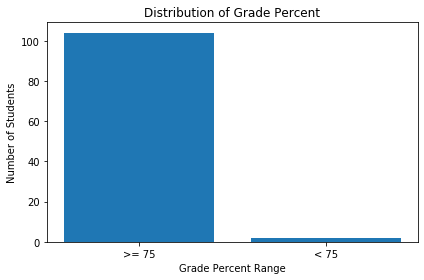

In [25]:
students_below_75 = students_data[students_data['grade_percent'] < 75]

# Count the number of students
num_students_below_75 = students_below_75.shape[0]

# Display the count
print(f"Number of students scoring < 75 grade percent: {num_students_below_75}")

# Optionally, you can plot the data using matplotlib
# Example: Plot a bar chart showing the count of students above 90 and below 90
grade_counts = students_data['grade_percent'].apply(lambda x: '< 75' if x < 75 else '>= 75').value_counts()

plt.bar(grade_counts.index, grade_counts.values)
plt.xlabel('Grade Percent Range')
plt.ylabel('Number of Students')
plt.title('Distribution of Grade Percent')
plt.tight_layout()
plt.show()

#### Count of students who are having less than 75 percent of attendance.

Students with attendance less than 75%:
Empty DataFrame
Columns: [student_id, first_name, last_name, attendance_percent]
Index: []


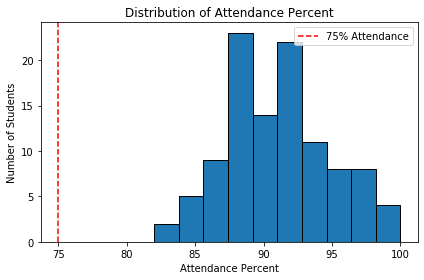

In [24]:
students_below_75_attendance = students_data[students_data['attendance_percent'] < 75]

# Display the information
print("Students with attendance less than 75%:")
print(students_below_75_attendance[['student_id', 'first_name', 'last_name', 'attendance_percent']])

# Optionally, you can plot the distribution of attendance using matplotlib
plt.hist(students_data['attendance_percent'], bins=10, edgecolor='black')
plt.xlabel('Attendance Percent')
plt.ylabel('Number of Students')
plt.title('Distribution of Attendance Percent')
plt.axvline(x=75, color='red', linestyle='--', label='75% Attendance')
plt.legend()
plt.tight_layout()
plt.show()

#### Plotting graph of attendance VS grade percent

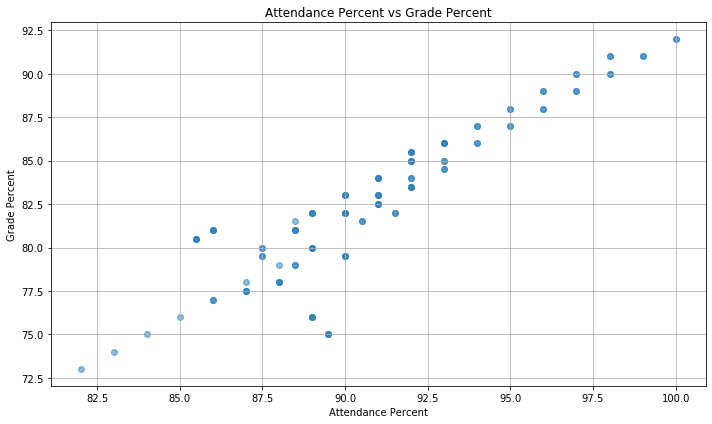

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(students_data['attendance_percent'], students_data['grade_percent'], alpha=0.5)
plt.title('Attendance Percent vs Grade Percent')
plt.xlabel('Attendance Percent')
plt.ylabel('Grade Percent')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Department wise average attendance

   department_id  avg_attendance
0              1       90.409091
1              2       91.363636
2              3       90.238095
3              4       90.521739
4              5       92.722222


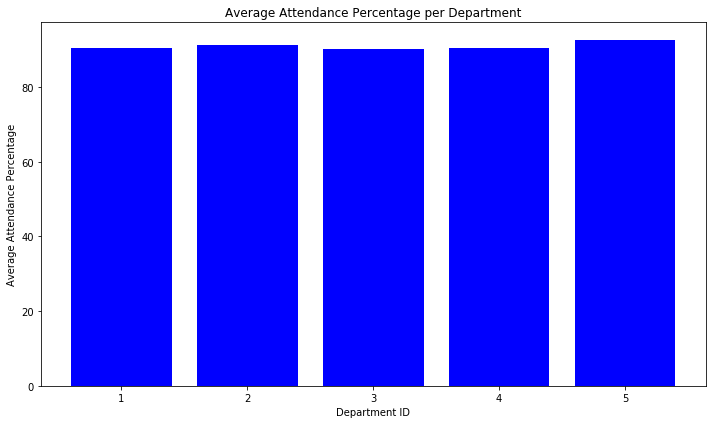

In [16]:
cursor.execute('SELECT department_id, AVG(attendance_Percent) AS avg_attendance FROM Students GROUP BY department_id; ')
# Fetch the data and store it into a Pandas DataFrame
avgAttendance_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
avgAttendance_data = pd.DataFrame(avgAttendance_data)
print(avgAttendance_data)
plt.figure(figsize=(10, 6))
plt.bar(avgAttendance_data['department_id'], avgAttendance_data['avg_attendance'], color='blue')
plt.xlabel('Department ID')
plt.ylabel('Average Attendance Percentage')
plt.title('Average Attendance Percentage per Department')
plt.xticks(avgAttendance_data['department_id'])
plt.tight_layout()
plt.show()

The students from department 5 i.e., Civil are maintaining good attendance percentage

In [29]:

merged_df = pd.merge(students_data, departments_data, on='department_id', how='inner')

# Grouping by department_name and calculating average grade_percent
department_avg_grade = merged_df.groupby('department_name')['grade_percent'].mean().reset_index()

# Finding department with highest average grade_percent
highest_avg_grade_dept = department_avg_grade.loc[department_avg_grade['grade_percent'].idxmax()]

# Displaying the department with highest average grade_percent
print(f"The department scoring the highest grade percent is: {highest_avg_grade_dept['department_name']}")
print(f"Average Grade Percent: {highest_avg_grade_dept['grade_percent']:.2f}")


The department scoring the highest grade percent is: Civil Engineering
Average Grade Percent: 84.00


Here we are getting information of department with highest average percent in the next table we can get all departments grade percent and come to know which is having higher and lower grade percent through graph.

           department_name  grade_percent
0        Civil Engineering      84.000000
1         Computer Science      81.909091
2   Electrical Engineering      81.738095
3  Electronics Engineering      83.454545
4   Mechanical Engineering      82.869565


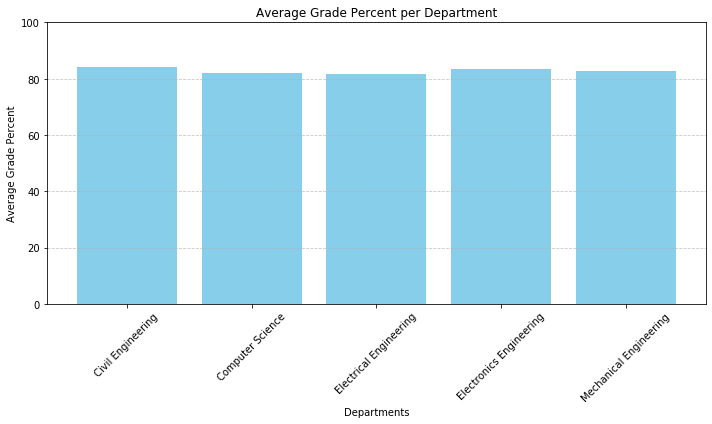

In [34]:
merged_df = pd.merge(students_data, departments_data, on='department_id', how='inner')

# Grouping by department_name and calculating average grade_percent
department_avg_grade = merged_df.groupby('department_name')['grade_percent'].mean().reset_index()

# Displaying average grade percent for every department
print(department_avg_grade)
department_avg_grade = pd.DataFrame(department_avg_grade)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(department_avg_grade['department_name'], department_avg_grade['grade_percent'], color='skyblue')
plt.xlabel('Departments')
plt.ylabel('Average Grade Percent')
plt.title('Average Grade Percent per Department')
plt.ylim(0, 100)  # Set y-axis limit if needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()








Electrical enginnering is scoring less grade percent.

## CONCLUSION
From the above tables and graphs the institutes are able to fetch the information of students  easily according to their requirements in different situations and are able to take actions on studies of students based on their performance.